In [2]:
import numpy as np

### Import Signal and Array

`signal.py` defines some commonly used signal types in DOA estimation. Each signal type is a class that inherits from the base class `Signal`. These classes are used to generate incident signals.  
`array.py` defines some commonly used array structures. Each array structure is a class that inherits from the base class `Array`. The `Array` class uses the signals generated by the `Signal` class and the incident angles to generate simulated data for the received signals of the array.


In [3]:
from doa_py.arrays import UniformCircularArray
from doa_py.signals import ComplexStochasticSignal

### Simulation Parameter Configuration

Define simulation parameters related to array structure, signal parameters, and incident direction to generate sampled array received signals.


In [4]:
# signal parameters
num_snapshots = 300
signal_fre = 3e8
fs = 7e8
snr = 10

# array parameters
num_antennas = 15
antenna_radius = 2 * (
    3e8 / signal_fre
)  # set the radius to twice the wavelength

# icident angles
angle_incidence = np.array([[30, -100, 90], [30, 30, 60]])
num_signal = angle_incidence.shape[1]

### Simulation Signal Generation

Instantiate `Array` and `Signal` and generate simulated data of array received signals.


In [5]:
signal = ComplexStochasticSignal(fc=signal_fre)

array = UniformCircularArray(m=num_antennas, r=antenna_radius)

received_data = array.received_signal(
    signal=signal,
    snr=snr,
    nsamples=num_snapshots,
    angle_incidence=angle_incidence,
    unit="deg",
)

### Incident Angle Estimation

Several classical DOA estimation algorithms are defined in the `algorithm` package, some of which will output the spatial spectrum, and some of which will directly output the estimated incident angle value.
So we first import two plotting functions, which are used to show the estimation results of these two algorithms.


In [6]:
from doa_py.plot import plot_estimated_value_2d, plot_spatial_spectrum_2d

#### UCA-RB-MUSIC Algorithm


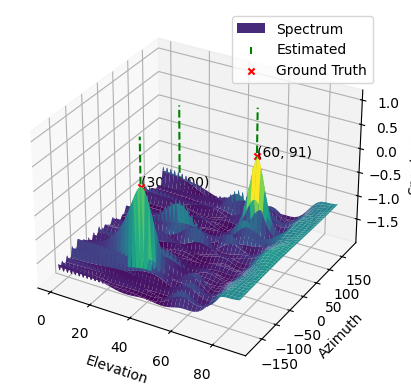

In [7]:
from doa_py.algorithm import uca_rb_music

azimuth_grids = np.arange(-180, 180, 1)
elevation_grids = np.arange(0, 90, 1)

spectrum = uca_rb_music(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
    azimuth_grids=azimuth_grids,
    elevation_grids=elevation_grids,
    unit="deg",
)

# plot the estimated spatial spectrum
plot_spatial_spectrum_2d(
    spectrum=spectrum,
    ground_truth=angle_incidence,
    num_signal=len(angle_incidence),
    azimuth_grids=azimuth_grids,
    elevation_grids=elevation_grids,
)

#### UCA-ESPRIT Algorithm


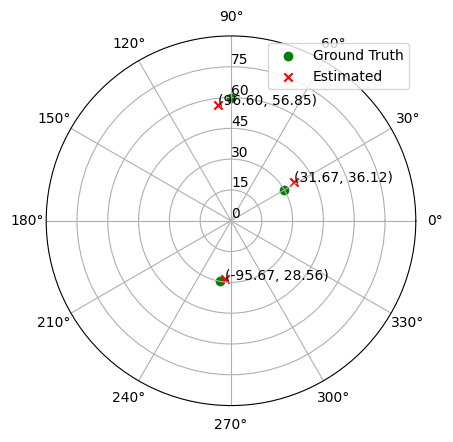

In [8]:
from doa_py.algorithm import uca_esprit

estimated_azimuth, estimated_elevation = uca_esprit(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
    unit="deg",
)

plot_estimated_value_2d(
    estimated_azimuth=estimated_azimuth,
    estimated_elevation=estimated_elevation,
    ground_truth=angle_incidence,
    unit="deg",
)